In [11]:
import pandas as pd
import numpy as np
import plotly.io as pio

# Set the renderer to open in your browser
pio.renderers.default = "browser"

In [3]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# fix columns names
df.columns = df.columns.str.strip()

# handle inf or Nan alues
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [4]:
# checking the number of rows and columns after cleaning
print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (225711, 79)


In [7]:
# Count the number of records for each label
label_count = df['Label'].value_counts().reset_index()
label_count.columns = ['Label', 'Count']

label_count.head()

,Label,Count
0,DDoS,128025
1,BENIGN,97686


In [ ]:
    # create a pie chart
    fig = px.pie(label_count, values='Count', names= 'Label', title='attack distribution')
    fig.show()

In [13]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

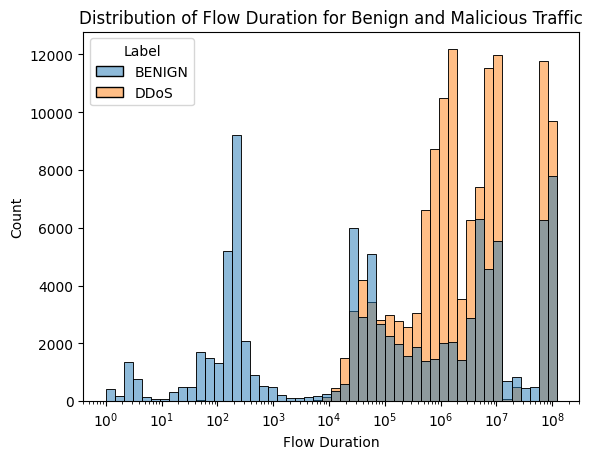

In [18]:
sns.histplot(data = df, x='Flow Duration', hue='Label', bins=50,log_scale=True)
plt.title('Distribution of Flow Duration for Benign and Malicious Traffic')
plt.xscale('log') # Use a log scale due to the wide range of values
plt.show()

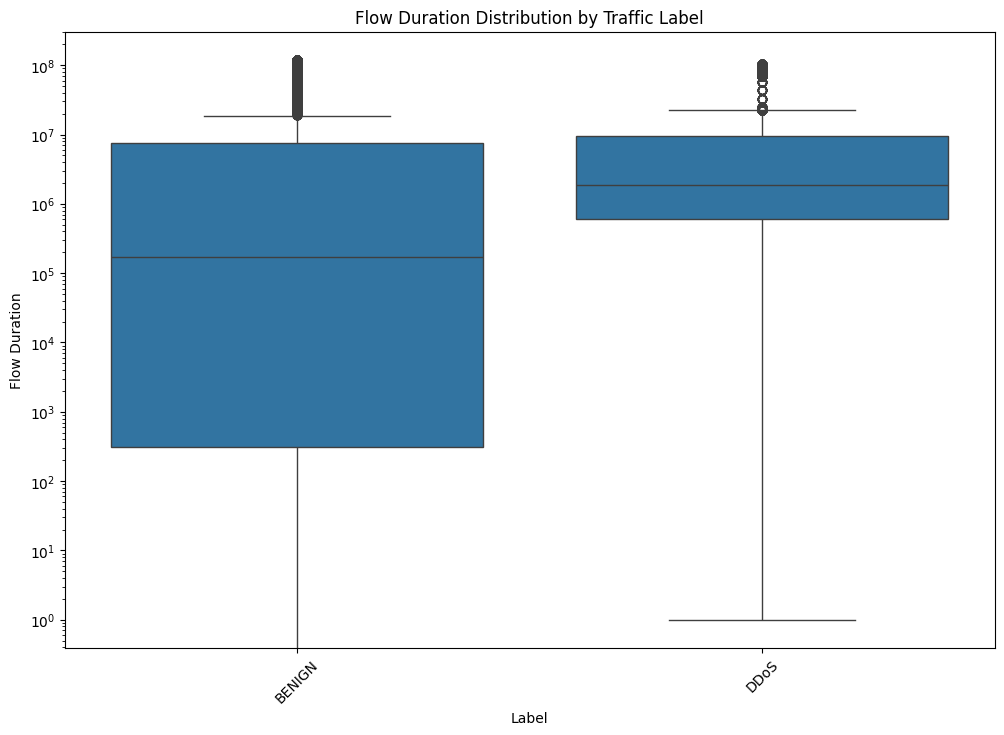

In [19]:
# Create a box plot to compare distributions more clearly
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Label', y='Flow Duration')
plt.title('Flow Duration Distribution by Traffic Label')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

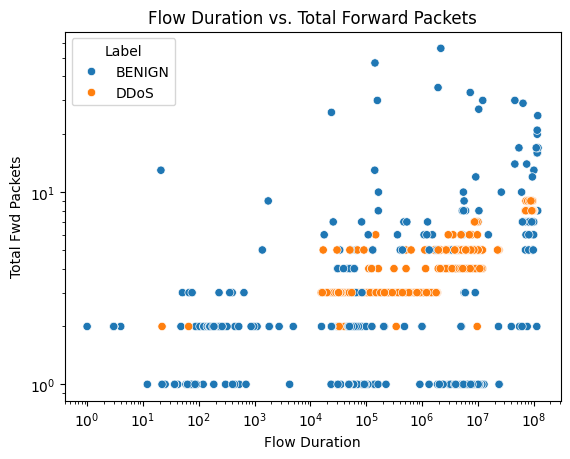

In [20]:
df_samples = df.sample(n = 1000, random_state=42)
plt.Figure(figsize=(12,8))
sns.scatterplot(data= df_samples, x='Flow Duration', 
                y='Total Fwd Packets', 
                hue='Label',)
plt.xscale('log')
plt.yscale('log')
plt.title('Flow Duration vs. Total Forward Packets')
plt.show()


C:\Users\Kathan Vyas\AppData\Local\Temp\ipykernel_33896\3550019584.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




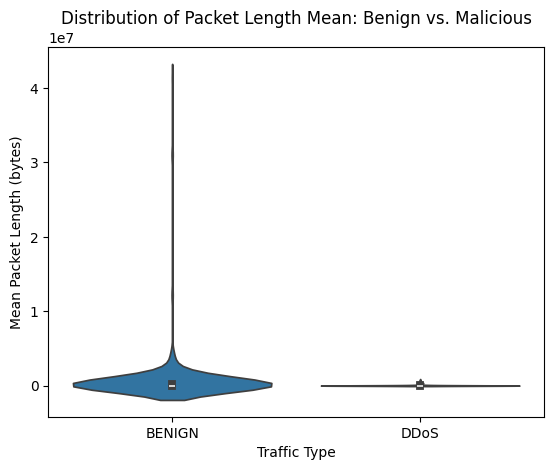

In [24]:
plt.Figure(figsize=(12,8))
sns.violinplot(data= df_samples, x='Label', y='Flow Bytes/s', palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Packet Length Mean: Benign vs. Malicious')
plt.xlabel('Traffic Type')
plt.ylabel('Mean Packet Length (bytes)')
plt.show()

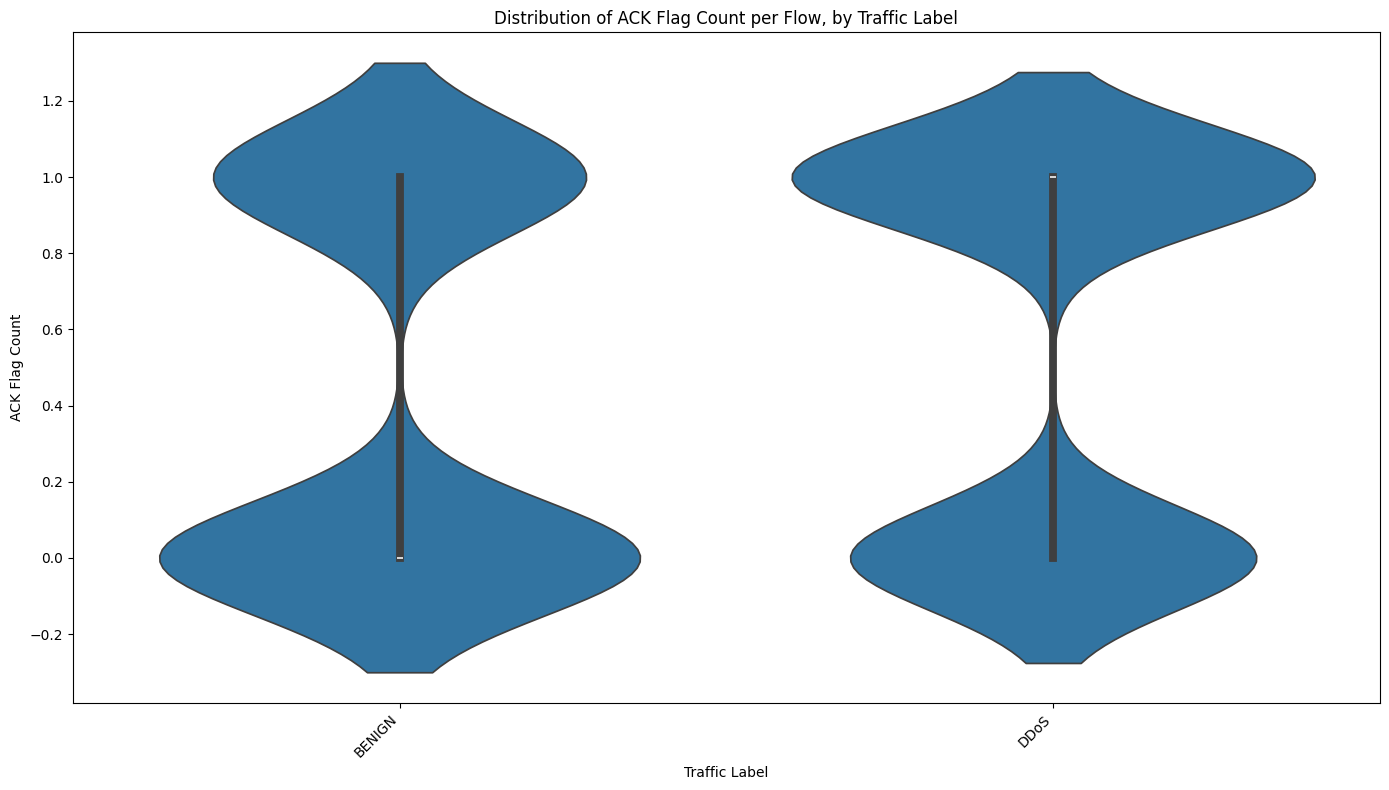

In [26]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_samples, x='Label', y='ACK Flag Count')
plt.title('Distribution of ACK Flag Count per Flow, by Traffic Label')
plt.xlabel('Traffic Label')
plt.ylabel('ACK Flag Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming 'df' is your preprocessed DataFrame from previous steps

# It's highly recommended to work on a sample for large datasets
# We'll take a random sample of 100,000 rows.
df_sample = df.sample(n=100000, random_state=42)

# For better performance and to focus on the most relevant features,
# you might want to drop some columns that are not as useful for ML.
# Example: IP addresses, which are high-cardinality and not great for generalization.
columns_to_drop = ['Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Timestamp']
df_sample = df_sample.drop(columns=columns_to_drop)

# If your 'Label' column is a mix of strings, it's good to ensure it's a categorical type
df_sample['Label'] = df_sample['Label'].astype('category')

ModuleNotFoundError: No module named 'ydata_profiling'